# Problem Statement
The task is to automate the categorization of famous landmarks.

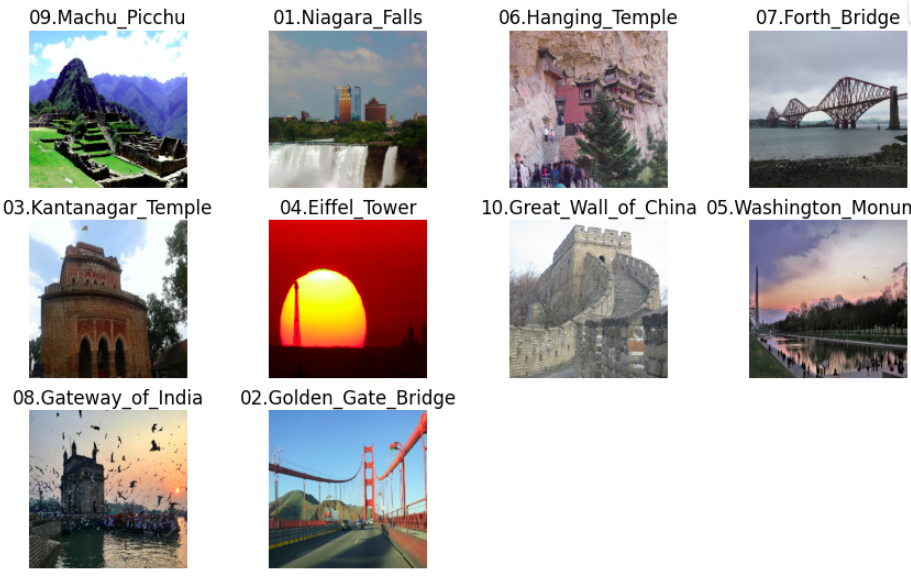

The dataset is obtained by downloading the images of the 10 famous landmark from Google search. Using these images, a CNN model has to be trained.

For inference, the CNN model will be fed with an image and the most probable landmark should be obtained as output.

# What Should Be The Performance Metric?
Accuracy would serve as a good performance metric. It is obtained by dividing the number of correct predictions by the total number of samples.

# Importing Python Packages

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import glob
import warnings

In [2]:
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
tf.keras.utils.set_random_seed(111)
warnings.filterwarnings("ignore")

# Importing The Dataset And Preprocessing

### What kind of preprocessing needs to be applied?
- Normalize images such that the range is between 0 and 1, instead of 0 and 255.
- Resize images to (227, 227, 3).

In [3]:
# importing the dataset
train_data = tf.keras.utils.image_dataset_from_directory("new_landmark_images/train/", shuffle = True, seed = 123, image_size = (227, 227), batch_size = 32)
val_data = tf.keras.utils.image_dataset_from_directory("new_landmark_images/validation/", shuffle = True, seed = 123, image_size = (227, 227), batch_size = 32)
test_data = tf.keras.utils.image_dataset_from_directory("new_landmark_images/test/", shuffle = True, seed = 123, image_size = (227, 227), batch_size = 32)

Found 737 files belonging to 10 classes.
Found 155 files belonging to 10 classes.
Found 43 files belonging to 10 classes.


In [4]:
# preprocessing
data_preprocessing = tf.keras.Sequential(
    name = "data_preprocessing",
    layers = [tf.keras.layers.Rescaling(1.0/ 255)]
)

train_ds = train_data.map(lambda x, y: (data_preprocessing(x), y))
val_ds = val_data.map(lambda x, y: (data_preprocessing(x), y))
test_ds = test_data.map(lambda x, y: (data_preprocessing(x), y))

# Visualizing Samples Of The Data

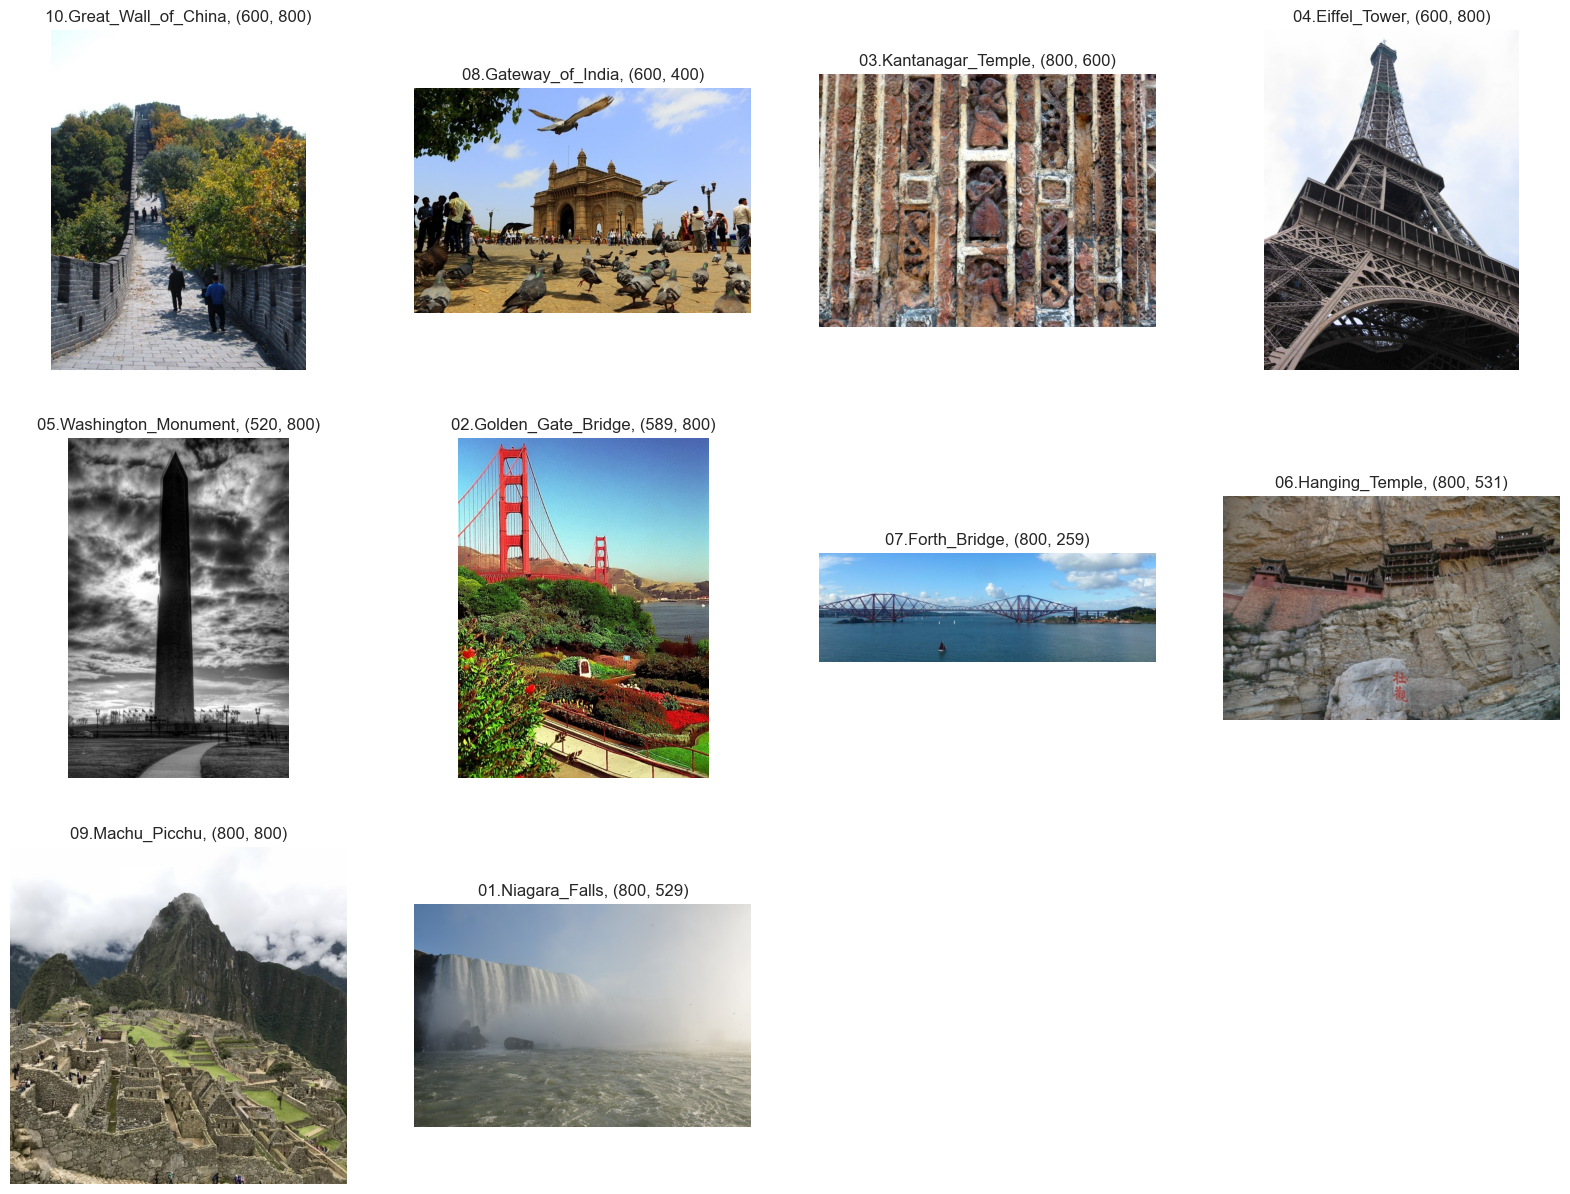

In [5]:
# list all the files inside the train directory
class_dirs = os.listdir("new_landmark_images/train/")
# dictionary to store the image array (key) for every class (value)
image_dict = {}
# dictionary to store the count of files (key) for every class (value)
count_dict = {}

# iterate through all the elements in class_dir
for cls in class_dirs:
    # create a list of all the paths in the sub-directory
    file_paths = glob.glob(f"new_landmark_images/train/{cls}/*")
    # count the number of files in each class and add it to count_dict
    count_dict[cls] = len(file_paths)
    # select a random item from the list of image paths
    image_path = random.choice(file_paths)
    # load the image using keras utility function and save it in image_dict
    image_dict[cls] = tf.keras.utils.load_img(image_path)

# visualize a random sample from each class
plt.figure(figsize = (20, 15))
# iterate through the dictionary items (class_label, image_dict)
for i, (cls, img) in enumerate(image_dict.items()):
    ax = plt.subplot(3, 4, i + 1)
    # plot each image
    plt.imshow(img)
    # set class name along with image size as the title
    plt.title(f"{cls}, {img.size}")
    plt.axis("off")

# Checking For Data Imbalance

In [6]:
# creating a DataFrame of all the classes in training dataset along with their counts
df_count_train = pd.DataFrame(
    {
        "class": count_dict.keys(),
        "count": count_dict.values()
    }
)

df_count_train

class  count
0  10.Great_Wall_of_China     72
1     08.Gateway_of_India     87
2    03.Kantanagar_Temple     88
3         04.Eiffel_Tower     64
4  05.Washington_Monument     83
5   02.Golden_Gate_Bridge     70
6         07.Forth_Bridge     82
7       06.Hanging_Temple     70
8         09.Machu_Picchu     55
9        01.Niagara_Falls     66

<Axes: title={'center': 'Count per class in training dataset'}, xlabel='class'>

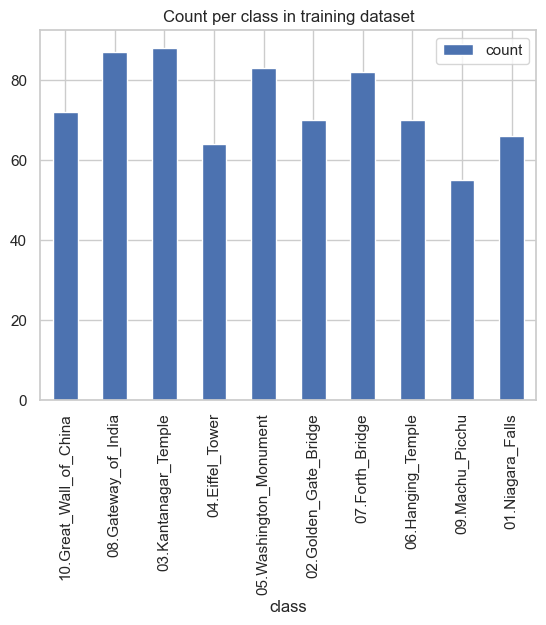

In [7]:
# plotting the data distribution of classes in the training dataset
df_count_train.plot.bar(x = "class", y = "count", title = "Count per class in training dataset")

In [8]:
# number of classes
len(count_dict.keys())

10

In [9]:
# names of the classes
for i in train_data.class_names:
    print(i)

01.Niagara_Falls
02.Golden_Gate_Bridge
03.Kantanagar_Temple
04.Eiffel_Tower
05.Washington_Monument
06.Hanging_Temple
07.Forth_Bridge
08.Gateway_of_India
09.Machu_Picchu
10.Great_Wall_of_China


Each class in the train dataset has about 70 images.

The same can be repeated for validation and test dataset as well.

Results,
- Each class in the validation dataset has about 15 images.
- Each class in the test dataset has about 5 images.

# How To Carry Out The Task Of Object Classification?
1. Create a CNN model from scratch to classify images.
2. Use Transfer Learning to apply the above model to classify the monument images.

# Creating A New Model
A Convilutional Neural Network (CNN) model can be built from scratch and can be used to classify the data.

The following are a few questions to keep in mind,
- How many `Convilutional` layer will be needed?
- What architecture should be chosen?
- How should the CNN/ Pooling/ Fully Connected layer be combined such that the best performance is obtained?
- What type of Kernel should be used `3x3`, `5x5` or `11x11`?
- Can high Accuracy be obtained if the dataset is small in size?

All the questions above prove that, a lot of experimentation will be required to obtain a model with very high Accuracy. Also, training a deep NN will require a lot of time.

Hence, instead of going through the whole of the above process from scratch, state-of-the-art models like VGGNet will be used. These models will be trained from scratch.

Prior to understanding VGGNet, AlexNet has to be understood.

# AlexNet
AlexNet is a CNN architecture designed by Alex Krizhevsky in collaboration witl Ilya Stutskerver and Geoffrey Hinton, who was Krizhevsky's Ph.D advisor at University of Toronto in 2012. It had 60 million parameters and 650,000 Neurons.

The original paper's primary result was that the depth of the model was essential for its high performance, which was computationally expensive, but made feasible due to the utilization of GPUs during training.

The 3 formed the team "SuperVision" and submitted AlexNet in the ImageNet Large Scale Visual Recognition Challenge on September 30, 2012. The network achieved a Top-5 Error of 15.3% and Top-5 Accuracy of 84.7%, which is more than 10.8% better than that of the runner-up.

The architecture influenced a large number of subsequent work in Deep Learning, especially in applying Neural Networks to Computer Vision.

### What is ImageNet competition?
The ImageNet project is a large visual database designed for use in visual object recognition software research. More than 14 million images have been hand-annotated by the project to indicate what objects are pictured and in at least one million of the images, bounding boxes are also provided. ImageNet contains more than 20000 categories, with a typical category, such as "balloon" or "strawberry", consisting of several hundred images. The database of annotations of third-party image URLs is freely available directly from ImageNet, though the actual images are not owned by ImageNet. Since 2010, the ImageNet project runs an annual software contest, the ImageNet Large Scale Visual Recognition Challenge (ILSVRC), where software programs compete to correctly classify and detect objects and scenes. The challenge uses a "trimmed" list of 1 thousand non-overlapping classes.

Further reading:
- https://www.image-net.org/challenges/LSVRC/
- https://devopedia.org/imagenet
- https://wordnet.princeton.edu

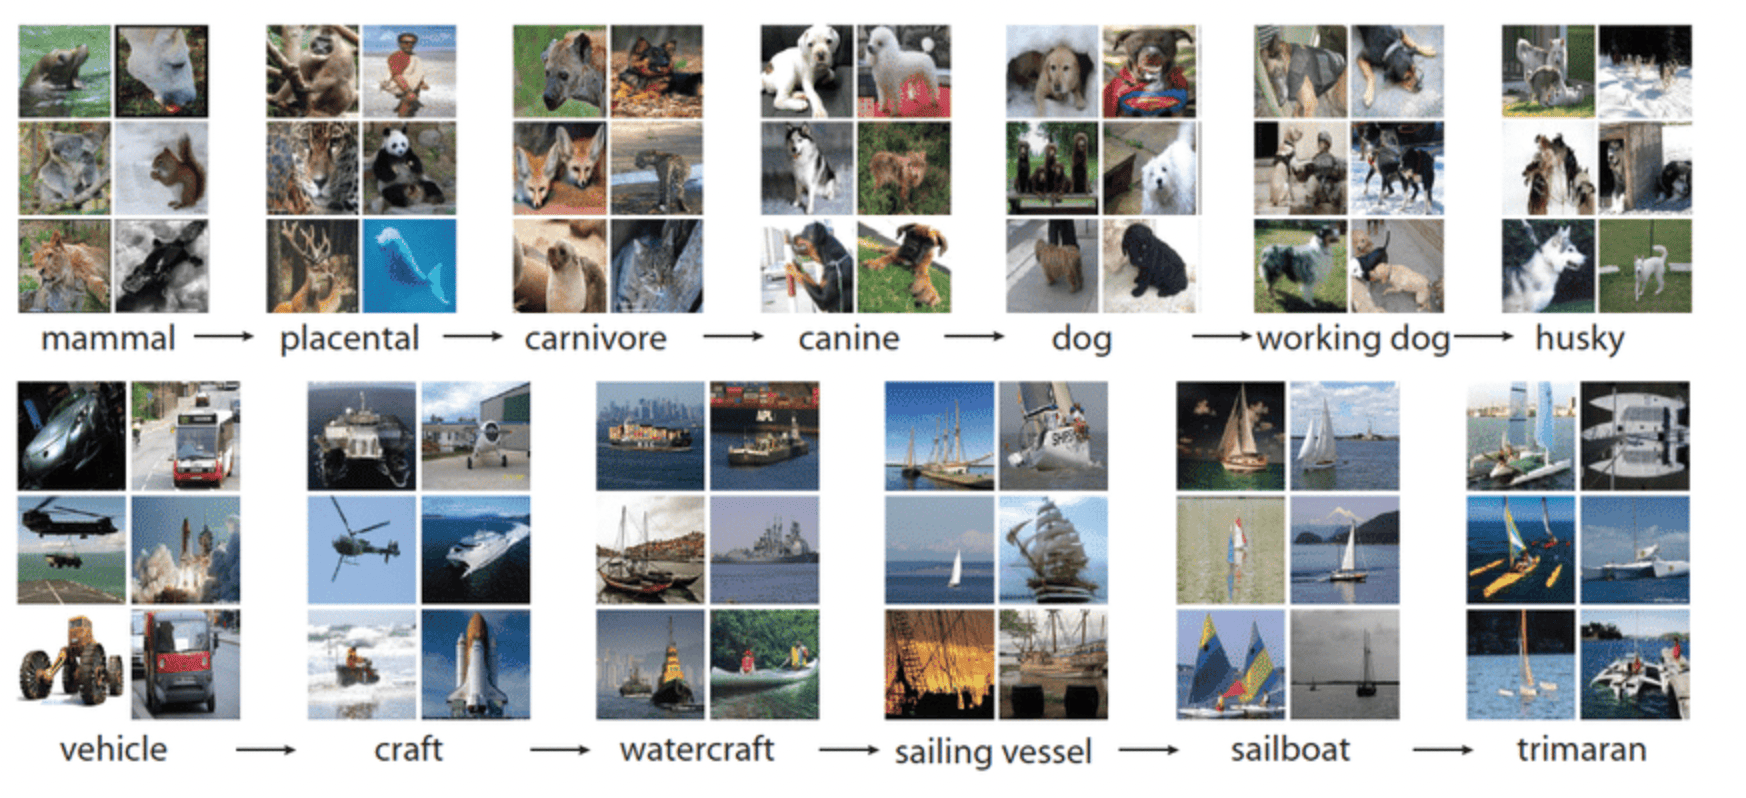

### What is Top-K Accuracy?
In multi-class classification problems, expecially in domains like Computer Vision and Recommendation Systems, traditional Accuracy might not always provide a complete picture of a model's performance. This is where Top-K Accuracy comes into play.

Instead of simply chacking if the model's top prediction matches the true label, Top-K Accuracy considers the model's top K predictions. If the true label appears anywhere within these top K prediction, the prediction is considered to be correct.

The following are the reasons it is useful,
1. Handles ambiguity: In many real-world scenarios, there might be multiple correct or highly plausible answers. Top-K Accuracy accounts for this ambiguity, providing a more realistic evaluation.
2. Relevance in specific domains:
    - Image recognition: A model might not perfectly identify a specific breed of dog but could correctly classify it as a canine.
    - Recommendation systems: Users might be interested in multiple products, not just the single top recommendation.

In essence, Top-K Accuracy provides a more nuanced assessment of a model's performance, especially in scenarios where multiple correct or highly relevant answers are acceptable.

| true_label | top_3_predicted_labels | correct |
| :-: | :-: | :-: |
| Cat | Cat, Lion, Dog | Yes |
| Dog | Giraffe, Lion, Cat | No |
| Lion | Cat, Lion, Dog | Yes |
| Giraffe | Giraffe, Dog, Cat | Yes |
| Dolphin | Dolphin, Cat, Giraffe | Yes |

### How is Top-K Accuracy helpful while working with images?
Top-K Accuracy is incredibly helpful when working with images, especially in scenarios with,
- Fine-grained classes:
    - Distinguishing between similar classes like "pick-up truck" and "minivan" can be challenging even for humans.
    - Top-K Accuracy acknowledges that the model might get close, placing the correct class within its top predictions.
- Subjective labeling:
    - Human annotators can have varying interpretations of image content.
    - For example, is a particular dog breed a "Golden Retriever" or a "Golden Doodle"?
    - Top-K Accuracy provides a more lenient evaluation when slight variations in labeling are expected.
- Noisy labels:
    - Datasets might contain mislabeled images due to human error or data collection issues.
    - Top-K Accuracy can help mitigate the impact of these noisy labels.

Key advantages of Top-K Accuracy in image classification are,
- Robustness to noise: More tolerant of minor labeling inconsistencies.
- Handles ambiguity: Acknowledges that multiple classes might be plausible for a given image.
- Better reflects human performance: Humans often do not always provide a single, perfectly accurate label.

For example, imagine a model classifying images of bird species,
- Traditional Accuracy: Requires the model to predict the exact bird species.
- Top-5 Accuracy: Considers the prediction correct if the true bird species is within the model's top 5 predictions.

This allows for some flexibility in model's predictions, making the evaluation more realistic and less sensitive to minor variations in appearance or labeling.

### What was so new about AlexNet?
AlexNet was a groundbreaking CNN that significantly advanced the field of Deep Learning. The following were the key innovations,
1. GPU acceleration:
    - Pioneering use: AlexNet was one of the first Deep Learning models to effectively leverage the power of GPUs for training.
    - Parallel processing: GPUs excel at parallel computations, which are crucial for training Deep Neural Networks with millions of parameters. By utilizing GPUs, AlexNet dramatically reduced the training time, making it feasible to train deeper and more complex models.
2. ReLU activation: 
    - Overcoming vanishing gradients: ReLU (Rectified Linear Unit) replaced traditional activation functions like Sigmoid and TanH. ReLU introduces non-linearity while being computationally more efficient. Importantly, it helps mitigate the "vanishing gradient problem", where gradients diminish rapidly during backpropagation in Deep Network, hindering effective training.
3. Data augmentation: 
    - Enhancing generalization: AlexNet employed data augmentation techniques such as random cropping, horizontal flipping and color jittering. This artifically increased the size of the training dataset, improving the model's ability to generalize to unseen data and reducing overfitting.
4. Dropout regularization:
    - Preventing overfitting: Dropout randomly deactivates a fraction of Neurons during training. This techniques prevents complex co-adaptations among Neurons, making the model more robust and less prone to overfitting.
5. Deeper architecture:
    - Increased model capacity: AlexNet consisted of eight layers, including convolution layers, pooling layers and fully connected layers. This deeper architecture allowed the model to learn more complex and hierarchical representation of images, leading to improved performance.

### Architecture of AlexNet
The following is an image showing architecture AlexNet,

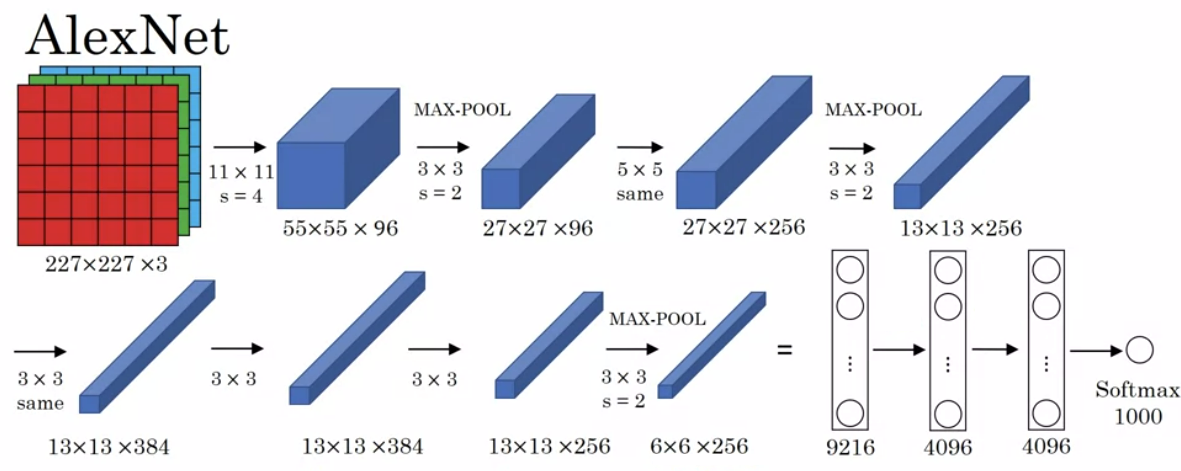

The following is an image showing the AlexNet layers computation,

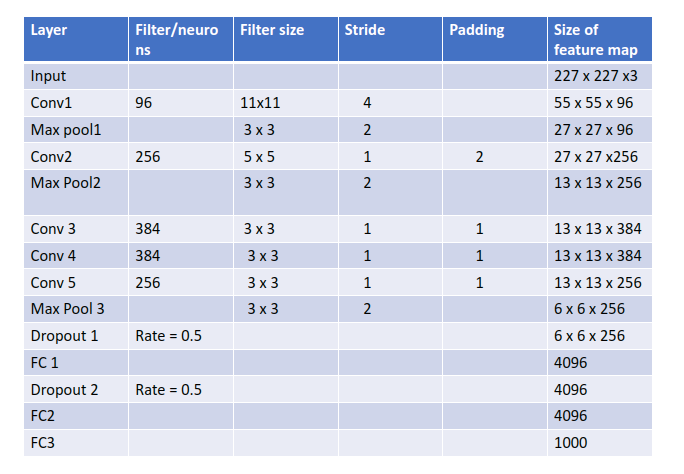

The following is an image showing the block diagram of AlexNet,

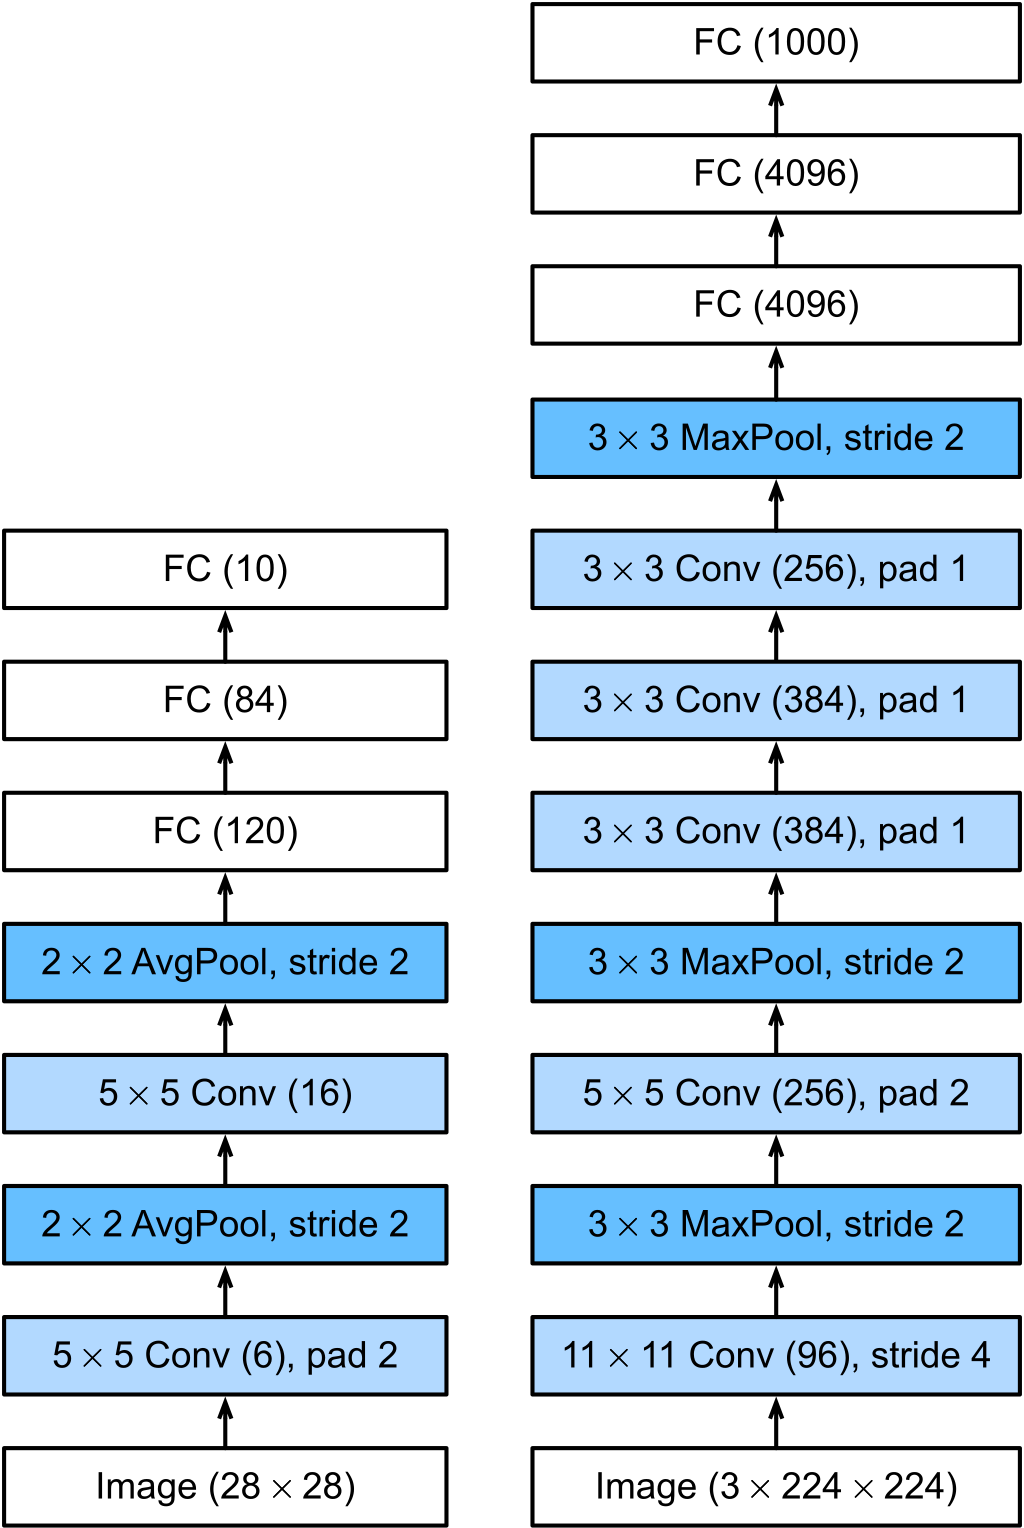

AlexNet has 5 `Convolutional` layers, 3 Fully Connected layers and 60 million parameters.

The following table contains the performance of AlexNet on ImageNet dataset,

| Model Name | Number Of Parameters | Top 1 Accuracy | Top 5 Accuracy |
| :-: | :-: | :-: | :-: |
| AlexNet | 60,000,000 | 63.3% | 84.7% |

### Shortcomings of AlexNet
1. Limited depth:
    - Expressiveness:
        - A single Neural Network layer with a linear activation function can only learn linear relationships.
        - Non-linear activation functions (like ReLU) are crucial for learning complex patterns in data.
        - Stacking multiple layers with non-linear activations allows the network to learn increasingly complex and hierarchical representations of the input data.
        - Each successive layer builds upon the features learned by previous layers, enabling the network to capture intricate relationships and patterns.
    - Perceptive field:
        - A single convolutional layer with a large filter size (like `128x128`) would be required to capture a feature spanning a large area of the image.
        - This would lead to an extremely large number of parameters, making the model computationally expensive and prone to overfitting.
        - Stacking multiple layers of smaller filters (e.g., `3x3`) achieves the same receptive field with significantly fewer parameters.
        - for example, 2 consecutive `3x3` `Convolutional` layers have an effective receptive field of `5x5` and 3 layers have a receptive field of `7x7`. This hierarchical approach allows the network to learn increasingly complex features at different scales.
    - Generalization:
        - A very deep single-layer network with a large number of parameters is prone to overfitting.
        - It might memorize the training data instead of learning generalizable features.
        - Deeper architecture with multiple layers encourage the network to learn a hierarchical representation of features.
        - Lower layers might learn basic features like edges and corners, while higher layers learn more complex features like shapes and objects.
        - This hierarchical representation helps the network generalize better to unseen data.
2. Large initial filters:
    - Computational cost:
        - Large filters like `11x11` in the initial layers require significantly more computations compared to smaller filters.
        - This increases training time and computational resources, making the model less efficient.
    - Parameter count:
        - Larger filters have a considerably higher number of parameters, which can lead to overfitting and increased memory requirements.
3. Limited performance potential:
    - While AlexNet achieved a significant breakthrough in image recognition, deeper architectures with more layers have consistently demonstrated further improvements in accuracy.
    - The increasing depth of subsequent architectures like VGGNet and ResNet has played a crucial role in pushing the boundaried of image recognition performance.

In summary, AlexNet, while groundbreaking, had limitations in terms of depth, filter sizes and computational efficiency. Subsequent research focused on addressing these limitations by exploring deeper architectures, smaller filter sizes and more efficient training techniques leading to significant advancements in the field of Deep Learning.

# VGGNet
VGGNets are a series of CNNs developed by the Visual Geometry Group (VGG) at the University of Oxford. 

The VGG family includes various configurations with different depth, denoted by the letter "VGG" followed by the number of weight layers. The most common ones are VGG-16 (12 `Convolutional` layers + 3 Fully Connected layers, 138 million parameters) and VGG-19 (16 + 3, 144 million parameters).

The VGG family were widely applied in various Computer Vision areas. An ensemble model of VGGNets achieved state-of-the-art results in ILSVRC in 2014. It was used as a baseline comparison in the ResNet paper for image classification, as the network in the Fast Region-Based CNN for object detection and as a base network in Neural Style Transfer.

The series was historically important as an early influential model designed by composing generic modules, where as AlexNet (2012) was designed from scratch, It was also instrumental in changing the standard Convolutional Kernels in CNN from large (up to `11x11` in AlexNet) to just `3x3`, a decision that was only revised in ConvNet (2022).

VGGNets were mostly obsoleted by Inception, ResNet and DenseNet. RepVGG (2021) is an update version of the architecture.

### VGG-16 architecture

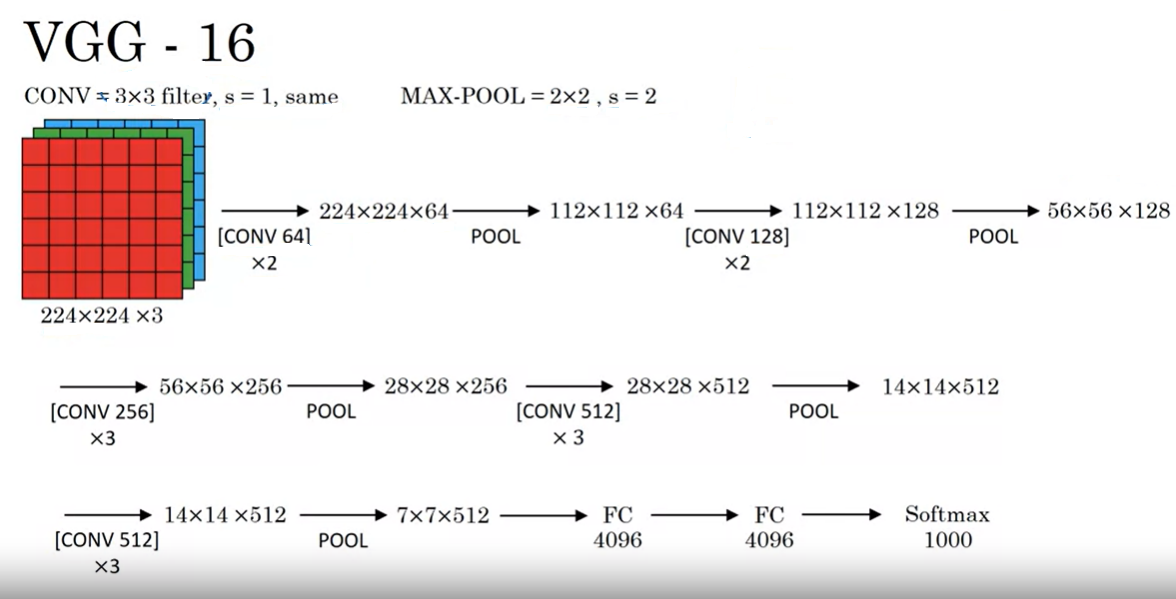

The following is an image showing VGG-16 layers computation,

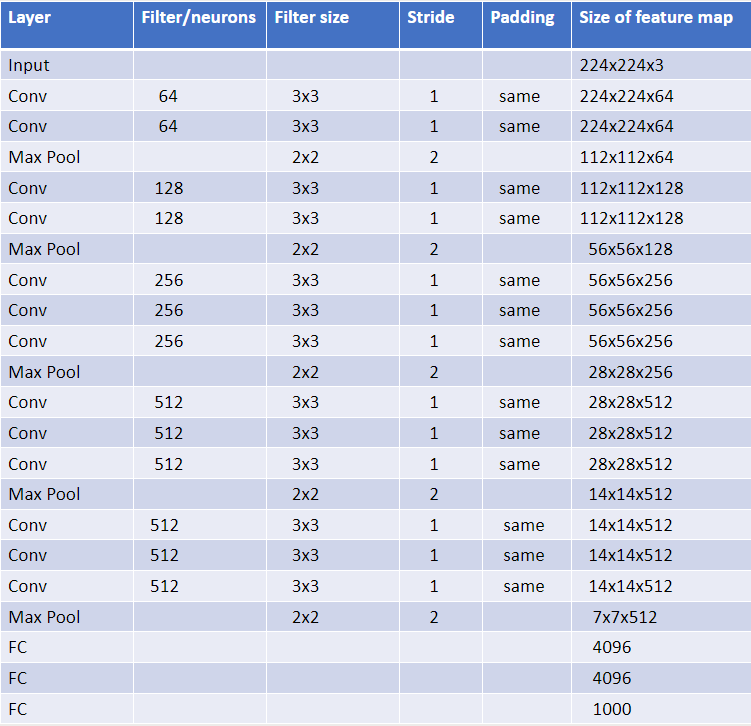

The following image shows the comparison of architectures of VGGNet and AlexNet,

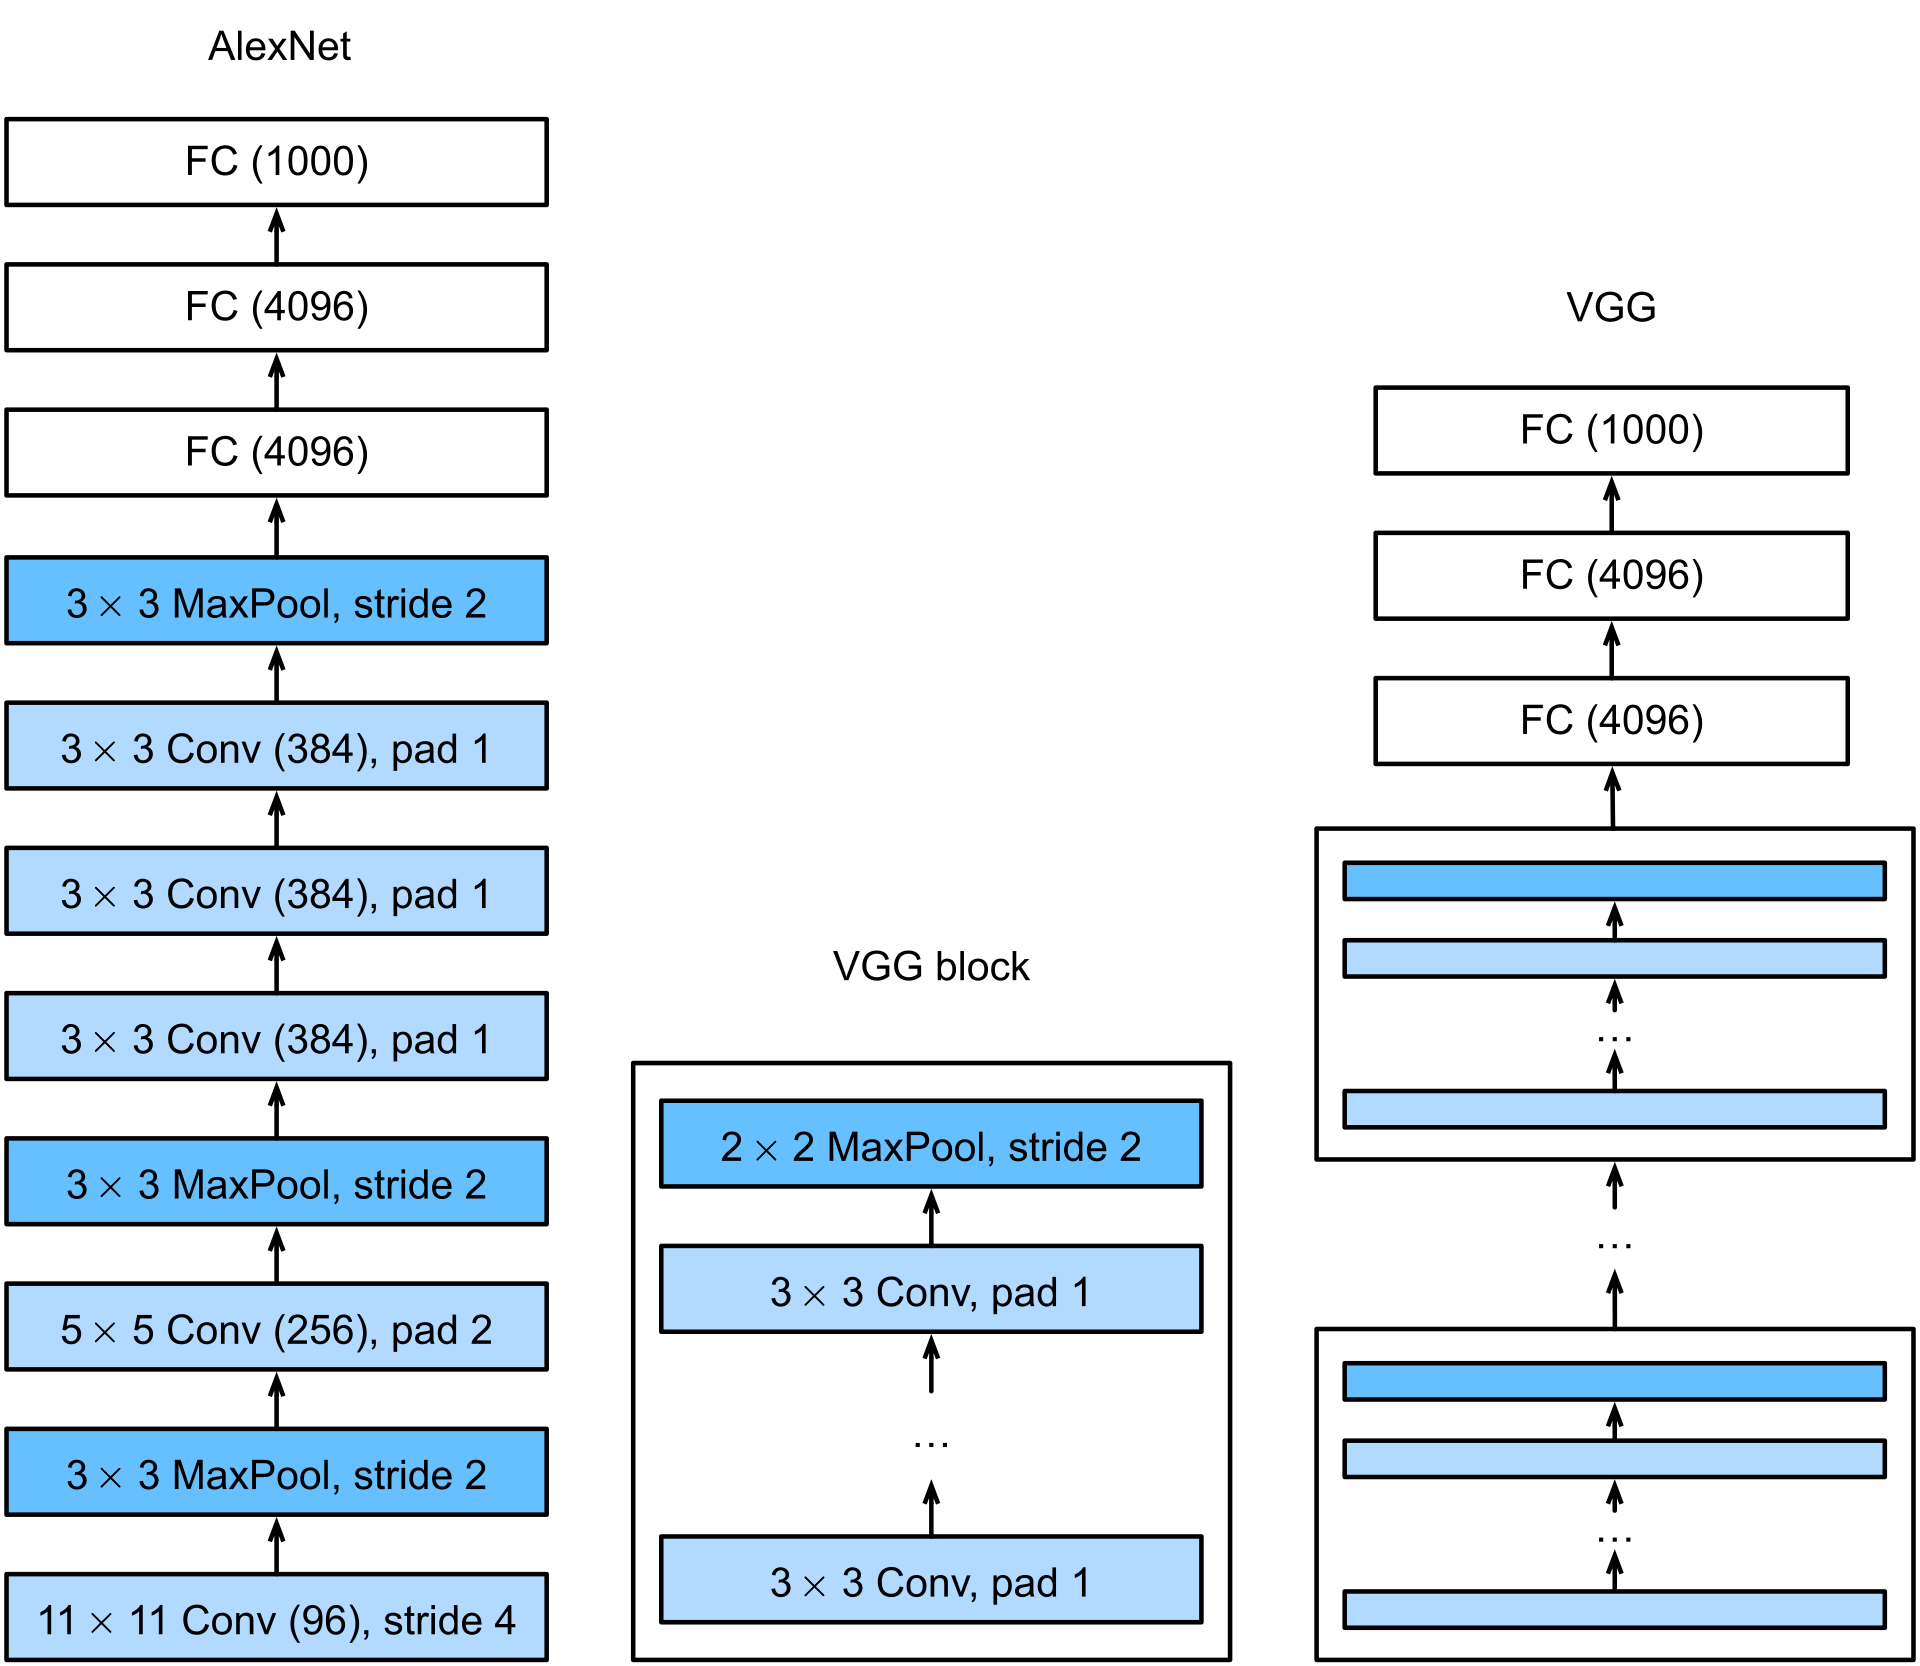

The key differenct between AlexNet and VGGNet is that, VGGNet uses only `3x3` filters, where as AlexNet had `11x11`, `5x5` and `3x3` filters.

### What are the advantages of using 2 `3x3` filters applied in sequence over a single `5x5` `Convolutional` filter?
Using 2 `3x3` filters applied in sequence instead of a single `5x5` `Convolutional` filter offers several key advantages,
1. Filter parameters:
    - 2 `3x3` filters in sequence have 18 learnable parameters, while a single `5x5` filter has 25. This reduction in parameters leads to,
        - Faster training: Fewer parameters mean less computation during training, resulting in faster training times.
        - Reduced memory usage: Smaller models require less memory, making them more suitable for deployment on devices with limited resources.
        - Reduced risk of overfitting: Fewer parameters can help prevent overfitting, as the model is likely to memorize the training data.
2. Increased non-linearity:
    - Improved feature extraction: By applying 2 `3x3` filters with non-linear activations (like ReLU) in between, the network introduces more non-linearity.
    - Enhanced feature learning: This increased non-linearity allows the network to learn more complex and expressive features from the input data, potentially improving model performance.
3. Receptive field:
    - Equivalent receptive field: 2 `3x3` filters applied sequentially have the same effective receptive field as a single `5x5` filter. This means they can capture information from the same spatial extent of the input image.

The following table contains the performance of AlexNet and VGGNets models on ImageNet dataset,

| Model Name | Number Of Parameters | Top 1 Accuracy | Top 5 Accuracy |
| :-: | :-: | :-: | :-: |
| AlexNet | 60,000,000 | 63.3% | 84.7% |
| VGGNet | 138,000,000 | 74.4% | 91.9% |
| VGGNet | 144,000,000 | 74.5% | 92.0% |

# Data Preprocessing
- Resizing: The input images are resized to `(224, 224, 3)` because VGGNets expects input images to be of `(224, 224, 3)` in size.
- Standardization: Pixel values are rescaled to lie between 0 and 1 by dividing it with 255 (since pixel values range from 0 to 255).

In [10]:
BATCH_SIZE = 128
tf.random.set_seed(10)
np.random.seed(10)

train_ds = tf.keras.utils.image_dataset_from_directory("new_landmark_images/train/", shuffle = True, seed = 123, image_size = (224, 224), batch_size = BATCH_SIZE)
val_ds = tf.keras.utils.image_dataset_from_directory("new_landmark_images/validation/", shuffle = False, seed = 123, image_size = (224, 224), batch_size = BATCH_SIZE)
test_ds = tf.keras.utils.image_dataset_from_directory("new_landmark_images/test/", shuffle = False, seed = 123, image_size = (224, 224), batch_size = BATCH_SIZE)

data_preprocessing = tf.keras.Sequential(
    name = "data_preprocessing",
    layers = [tf.keras.layers.Rescaling(1.0/ 255)]
)

train_ds = train_ds.map(lambda x, y: (data_preprocessing(x), y))
val_ds = val_ds.map(lambda x, y: (data_preprocessing(x), y))
test_ds = test_ds.map(lambda x, y: (data_preprocessing(x), y))

Found 737 files belonging to 10 classes.
Found 155 files belonging to 10 classes.
Found 43 files belonging to 10 classes.


In [11]:
lenet_model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape = (28, 28, 1)),
        tf.keras.layers.Conv2D(6, kernel_size = (5, 5), activation = "sigmoid"),
        tf.keras.layers.AveragePooling2D(pool_size = (2, 2), strides = (2, 2)),
        tf.keras.layers.Conv2D(16, kernel_size = (5, 5), activation = "sigmoid"),
        tf.keras.layers.AveragePooling2D(pool_size = (2, 2), strides = (2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation = "sigmoid"),
        tf.keras.layers.Dense(84, activation = "sigmoid"),
        tf.keras.layers.Dense(10, activation = "sigmoid")
    ]
)

lenet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
vgg_16_model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape = (224, 224, 3)),
        tf.keras.layers.Conv2D(64, kernel_size = (3, 3), padding = "same", activation = "relu"),
        tf.keras.layers.Conv2D(64, kernel_size = (3, 3), padding = "same", activation = "relu"),
        tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),
        tf.keras.layers.Conv2D(128, kernel_size = (3, 3), padding = "same", activation = "relu"),
        tf.keras.layers.Conv2D(128, kernel_size = (3, 3), padding = "same", activation = "relu"),
        tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),
        tf.keras.layers.Conv2D(256, kernel_size = (3, 3), padding = "same", activation = "relu"),
        tf.keras.layers.Conv2D(256, kernel_size = (3, 3), padding = "same", activation = "relu"),
        tf.keras.layers.Conv2D(256, kernel_size = (3, 3), padding = "same", activation = "relu"),
        # tf.keras.layers.Conv2D(256, kernel_size = (3, 3), padding = "same", activation = "relu"),
        tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),
        tf.keras.layers.Conv2D(512, kernel_size = (3, 3), padding = "same", activation = "relu"),
        tf.keras.layers.Conv2D(512, kernel_size = (3, 3), padding = "same", activation = "relu"),
        tf.keras.layers.Conv2D(512, kernel_size = (3, 3), padding = "same", activation = "relu"),
        # tf.keras.layers.Conv2D(512, kernel_size = (3, 3), padding = "same", activation = "relu"),
        tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),
        tf.keras.layers.Conv2D(512, kernel_size = (3, 3), padding = "same", activation = "relu"),
        tf.keras.layers.Conv2D(512, kernel_size = (3, 3), padding = "same", activation = "relu"),
        tf.keras.layers.Conv2D(512, kernel_size = (3, 3), padding = "same", activation = "relu"),
        # tf.keras.layers.Conv2D(512, kernel_size = (3, 3), padding = "same", activation = "relu"),
        tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),
        tf.keras.layers.Flatten(),
        # tf.keras.layers.Dense(4096, activation = "relu"),
        # tf.keras.layers.Dropout(0.5),
        # tf.keras.layers.Dense(4096, activation = "relu"),
        # tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation = "softmax")
    ]
)

vgg_16_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │       250,890 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,965,578 (57.09 MB)

 Trainable params: 14,965,578 (57.09 MB)

 Non-trainable params: 0 (0.00 B)

In the above code lines, if the `Convolutional` layers (`Conv2D`) are uncommented then the resulting model will be a VGG-19 model.

Observe that, in the above lines of code, Fully Connected (`Dense`) layers are commented for faster training.

In [13]:
import functools

top_5_accuracy = functools.partial(tf.keras.metrics.SparseTopKCategoricalAccuracy())

optimizer = tf.keras.optimizers.SGD(learning_rate = 0.005, momentum = 0.99)

# compiling the model
vgg_16_model.compile(optimizer = optimizer, loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

vgg_16_model.optimizer.get_config()

{'name': 'SGD',
 'learning_rate': 0.004999999888241291,
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'loss_scale_factor': None,
 'gradient_accumulation_steps': None,
 'momentum': 0.99,
 'nesterov': False}

In [14]:
# training the model for 5 epochs
history = vgg_16_model.fit(train_ds, epochs = 5, validation_data = val_ds)

Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 393s 68s/step - accuracy: 0.0869 - loss: 2.3026 - val_accuracy: 0.0968 - val_loss: 2.3026
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 472s 77s/step - accuracy: 0.1096 - loss: 2.3018 - val_accuracy: 0.1032 - val_loss: 2.3026
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 422s 69s/step - accuracy: 0.1064 - loss: 2.3008 - val_accuracy: 0.1032 - val_loss: 2.3028
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 402s 67s/step - accuracy: 0.1136 - loss: 2.2994 - val_accuracy: 0.1032 - val_loss: 2.3035
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 418s 70s/step - accuracy: 0.1140 - loss: 2.2958 - val_accuracy: 0.1032 - val_loss: 2.3051


In [15]:
# save the model
# !mkdir -p saved_vgg_16_model
# vgg_16_model.save("saved_vgg_16_model/vgg_16_model")

# vgg_16_model.save("vgg_16_model.h5")

# the following line of code can also be used to save the model (preferrably)
# vgg_16_model.save("vgg_16_model.keras")

In [16]:
# loading the saved model
# https://drive.google.com/uc?id=1dwwgrguj9NDIgdnFfdnYZoMsBFVMD3xV
# vgg_16_model = tf.keras.models.load_model("vgg_16_model.h5")

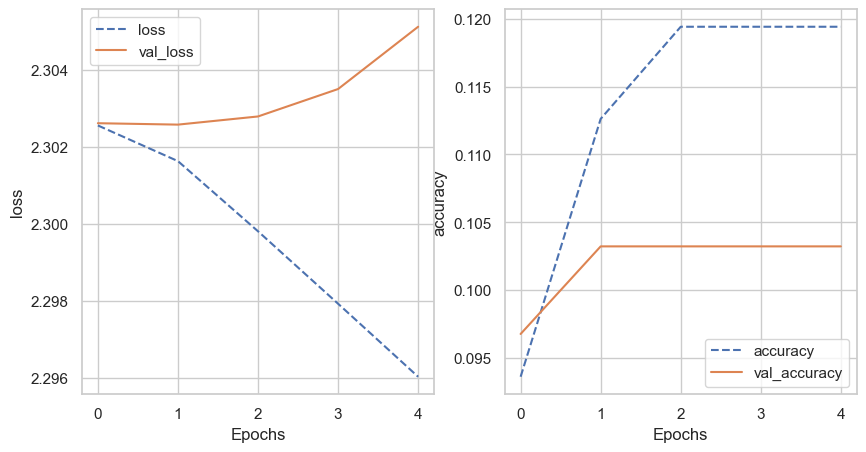

In [17]:
def training_plot(metrics, history):
    f, ax = plt.subplots(1, len(metrics), figsize = (5 * len(metrics), 5))
    for idx, metric in enumerate(metrics):
        ax[idx].plot(history.history[metric], ls = "dashed")
        ax[idx].set_xlabel("Epochs")
        ax[idx].set_ylabel(metric)
        ax[idx].plot(history.history["val_" + metric])
        ax[idx].legend([metric, "val_" + metric])

training_plot(["loss", "accuracy"], history)

In [18]:
# evaluating the model
loss, accuracy = vgg_16_model.evaluate(test_ds, verbose = 2)
print("Accuracy = {:5.2f}%".format(100 * accuracy))

1/1 - 7s - 7s/step - accuracy: 0.1163 - loss: 2.3042
Accuracy = 11.63%


Accuracy of 11.63% implies that the model is obviously not doing well on the test data. This is because the size of the dataset is small for training state-of-the-art models like VGG from scratch.

# How To Improve The Performance Of The Model If The Dataset Size Is Small?
Collecting more images for each class can be one of the solutions, but it is a time consuming process and also sometimes collecting more images is an expensive task.

Another approach called "Transfer Learning" can instead be used.

### What are the primary reasons for Deep Learning becoming popular?
Deep Learning has witnessed a meteoric rise in recent years, transforming fields like Computer Vision, Natrual Language Processing and Artificial Intelligence. This surge can be attributed to a confluence of factors,
1. Data-driven revolution:
    - Large-scale datasets: The availability of massive, high-quality datasets like ImageNet, containing millions of labeled images, has been instrumental. These datasets provide the "fuel" for Deep Learning models to learn complex 
    - Data generation: The digital age has ushered in an era of unprecedented data generation. From social media to IoT devices, data is being produced at an exponential rate, providing a continuous stream of information for Deep Learning models to learn from.
2. Computational power:
    - GPUs: The advent of powerful GPUs has revolutionized Deep Learning. GPUs are designed for parallel processing, making them ideal for handling the massive computations required by Deep Neural Networks.
    - Cloud computing: Cloud computing platforms like AWS, Google Cloud and Azure provide access to high performance computing resources, enabling researchers and developers to train large-scale models without the need for expensive hardware.
3. Algorithmic advancements:
    - Model architectures: Researchers have developed sophisticated model architectures like CNNs for image recognition, Recurrent Neural Networks (RNNs) for sequential data and Transformer for NLP. These architectures have proven highly effective in solving complex tasks.
    - Optimization algorithms: Advanced optimization algorithms like Adam, RMSprop and SGD with momentum have significantly improved the training process of Deep Learning models, enabling them to converge faster and achieve better performance.
4. Transfer learning: Transfer learning has emerged as a powerful technique that leverages pre-trained models to accelerate the training process for new tasks. These pre-trained models, often trained on massive datasets like ImageNet, have learned general features and representations that can be adapted to new tasks with relatively small datasets.
    - Reduced training time: Transfer Learning significantly reduces the time and computational resources required to train new models. By fine-tuning a pre-trained model, developers can achieve high accuracy with minimal training data.
    - Improved performance: In many cases, Transfer Learning can lead to better performance than training a model from scratch, especially when the amount of available data is limited.

# What Is Transfer Learning?
Transfer Learning in the context of CNNs is a powerful technique that leverages the knowledge gained from training a model on one task to improve its performance on a different, but related, task.

### Why Transfer Learning?
Training a deep CNN from scratch can be a computationally expensive and time-consuming endeavor, especially when dealing with large datasets. Transfer Learning offers several key advantages like,
- Reduced training time: By utilizing a pre-trained model, the training time can be significantly reduced. This is because the pre-trained model has already learned valuable features from a massive dataset, such as ImageNet.
- Improved performance: Transfer Learning often leads to better performance, especially when the amount of available data for the new task is limited. The pre-trained model provides a strong foundation, allowing the model to generalize better and achieve higher accuracy.
- Resource efficiency: Training deep CNNs requires substantial computational resources. Transfer Learning can reduce the computational cost by leveraging existing pre-trained models.

### How does Transfer Learning work in CNNs?
1. Pre-trained model: A pre-trained CNN model, typically trained on a large dataset like ImageNet. These models, such as VGG, ResNet or Inception, have learned to extract general visual features like edges, textures and shapes.
2. Feature extraction: The `Convolutional` layers of the pre-trained model are utilized to extract features from the new dataset. These `Convolutional` layers have learned to detect low-level features (edges) to high-level features (objects) in images.
3. Fine-tuning: The final fully connected layers of the pre-trained model are replaced with new layers that are specific to the new task. These new layers are then trained on out target dataset.
4. Training: During training, the earlier `Convolutional` layers are kept frozen (i.e., their weights are not updated). This ensures that the valuable features learned from the pre-trained model are preserved. Only the newly added layers are trained on the new dataset.

In essence, Transfer Learning in CNNs allows to leverage the power of pre-trained models to quickly and effectively train new models on a variety of tasks.

### Key considerations
- Choosing the right pre-trained model: Selecting a pre-trained model that is relevant to the new task is crucial. For example, if the new task involves medical imaging, a pre-trained model trained on natural images might not be the best choice.
- Fine-tuning strategy: The strategy for fine-tuning the model can significantly impact performance. This includes deciding which layers to freeze, the learning rate and the number of training epochs.
- Data augmentation: Data augmentation techniques can be used to artifically increase the size of the training dataset, further improving the performance of the transfer learning model.

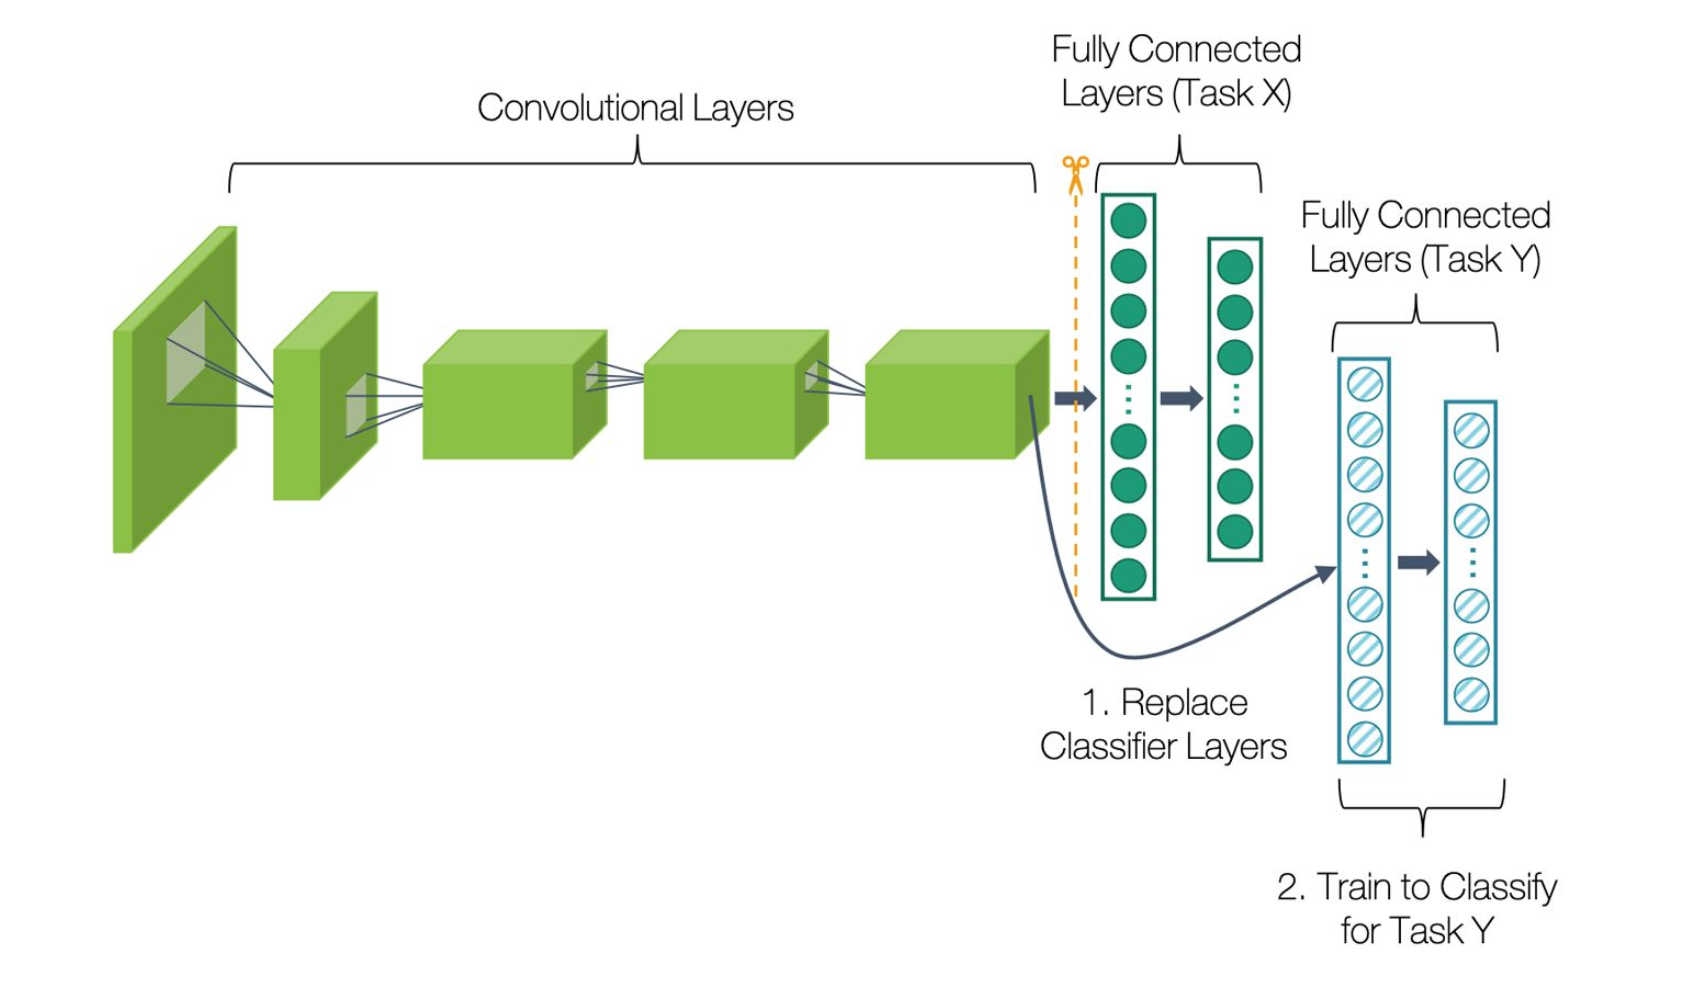

Therefore, a model which has been trained on ImageNet dataset (which contains millions of images) like, VGGNet can be used by changing the last few Fully Connected (`Dense`) layers to the number of classes as in the given task. This is helps in reducing the training time as only the last few Fully Connected layers will be trained.

Also, the model trained using Transfer Learning will be able to achieve high accuracy.

# Applying Transfer Learning To The Task
- The pre-trained `Convolutional` layers from the VGG-16 will be used.
- Along with the above, a Fully Connected (`Dense`) layer will be added where the number of Neurons will be equal to the number of output class.
- In the process of training, only this Fully Connected layer will be trained and all the other layers are kept forzen.

In [19]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [20]:
pretrained_model = tf.keras.applications.VGG16(weights = "imagenet", include_top = False, input_shape = [224, 224, 3])
pretrained_model.trainable = False
vgg_16_model = tf.keras.Sequential(
    [
        pretrained_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation = "softmax")
    ]
)

- The `tf.keras.applications.VGG16` will load the weight of VGG model trained on ImageNet dataset. `include_top = False` ensures that there are only `Convolutional` layers and no Fully Connected Layers.
- The command `pretrained_model.trainable = False` ensures that the weights for these layers is frozen.

In [21]:
vgg_16_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │       250,890 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,965,578 (57.09 MB)

 Trainable params: 250,890 (980.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [22]:
top_5_accuracy = functools.partial(tf.keras.metrics.SparseTopKCategoricalAccuracy())

vgg_16_model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [23]:
history = vgg_16_model.fit(train_ds, epochs = 5, validation_data = val_ds)

Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 137s 23s/step - accuracy: 0.2705 - loss: 2.5969 - val_accuracy: 0.5742 - val_loss: 1.3162
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 131s 22s/step - accuracy: 0.6429 - loss: 1.0251 - val_accuracy: 0.7032 - val_loss: 0.8022
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 132s 22s/step - accuracy: 0.8394 - loss: 0.5594 - val_accuracy: 0.8258 - val_loss: 0.5607
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 132s 22s/step - accuracy: 0.9233 - loss: 0.2953 - val_accuracy: 0.8065 - val_loss: 0.6085
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 133s 23s/step - accuracy: 0.9638 - loss: 0.1974 - val_accuracy: 0.7935 - val_loss: 0.5536


In [24]:
# the model can be saved if there is a need
# vgg_16_model.save("vgg_16_model.h5")

By training a VGG-16 model using Transfer Learning, the validation accuracy obtained is as above after just 5 epochs, which the definitely much better than the one obtained by the model built from scratch.

Hence using Transfer Learning a high accuracy is obtained and the training time required is less.

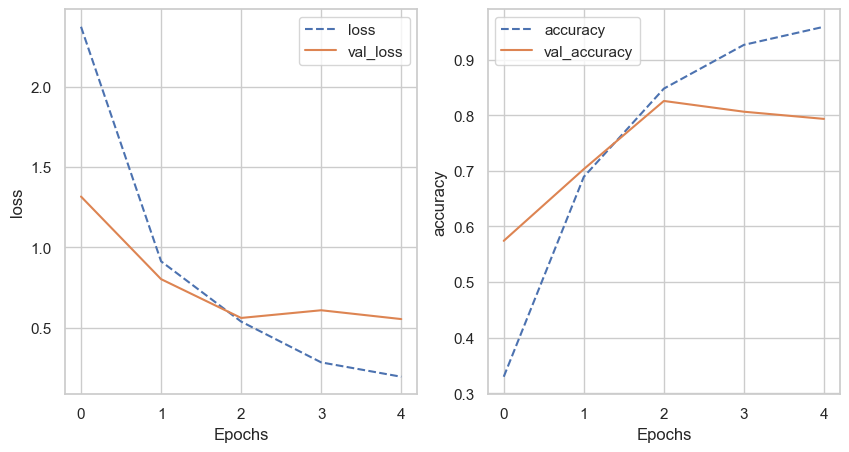

In [25]:
def training_plot(metrics, history):
    f, ax = plt.subplots(1, len(metrics), figsize = (5 * len(metrics), 5))
    for idx, metric in enumerate(metrics):
        ax[idx].plot(history.history[metric], ls = "dashed")
        ax[idx].set_xlabel("Epochs")
        ax[idx].set_ylabel(metric)
        ax[idx].plot(history.history["val_" + metric])
        ax[idx].legend([metric, "val_" + metric])

training_plot(["loss", "accuracy"], history)

In [26]:
# evaluating the model
loss, accuracy = vgg_16_model.evaluate(test_ds, verbose = 2)
print("Accuracy = {:5.2f}%".format(100 * accuracy))

1/1 - 6s - 6s/step - accuracy: 0.8140 - loss: 0.6830
Accuracy = 81.40%


In [27]:
true_categories = tf.concat([y for x, y in test_ds], axis = 0)
images = tf.concat([x for x, y in test_ds], axis = 0)
y_pred = vgg_16_model.predict(test_ds)
class_names = test_data.class_names

2025-01-04 14:17:53.976107: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-01-04 14:17:54.044340: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


In [28]:
def plot_image(pred_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax(pred_array)
    
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel("{} {:2.0f}% ".format(class_names[predicted_label], 100 * np.max(pred_array)), color = color)

In [29]:
# random sample 15 test images and plot it with their predicted labels and the true labels
indices = random.sample(range(len(images)), 15)

# display correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize = (4 * num_cols, 2 * num_rows))
for i, index in enumerate(indices):
    plt.subplot(num_rows, num_cols, i + 1)
    plot_image(y_pred[index], true_categories[index], images[index])

plt.tight_layout()
plt.show()

# Shortcomings Of VGGNet
- Massive number of parameters: The primary drawback of VGGNet is its sheer size. With roughly 144 million parameters, primarily concentrated in the final 3 Dully Connected (FC) layers, it demands substantial storage space (around 500MB) and computational resources.
- Parameter distribution: The majority of parameters reside within the Fully Connected layers, which, while are crucial for classification, are less effective at capturing intricate spatial features directly from the image compared to the convolutional layers.

### Overcoming shortcomings with Global Average Pooling (GAP)
- To address the above limitations, VGGNet can be modified by incorporating GAP before the final Fully Connected layers.
- How does GAP works?
    1. Dimension reduction: GAP takes the output of the final convolutional layer, typically a `7x7x512` feature map.
    2. Averaging: It averages each of the 512 feature maps across the spatial dimensions (`7x7`), resulting in a single scalar value.
    3. Dense layer input: This process effectively reduces the `7x7x512` feature map to `1x1x512` vector, which is then fed into a dense layer.
- Benefits of GAP:
    1. Parameter reduction: By eliminating the need for large Fully Connected layers, GAP significantly reduces the number of parameters in the network.
    2. Improved performance: Suprisingly, GAP often leads to improved performance, particularly in terms of generalization and robustness to overfitting. This is attributed to the fact that GAP encourages the network to learn more discriminative features in the convolutional layers.

In essence, GAP acts as a bridge between the convilutional layers and the final classification layer, effectively reducing the number of parameters while maintaining or even enhancing the network's performance.



This gave origins to the next architecture called GoogleNet (Inception)